In [5]:
import pandas as pd
#from blimpy import Waterfall
import numpy as np

import os, sys
sys.path.insert(1,'/Users/bbrzycki/Documents/Research/Breakthrough-Listen/Code/blimpy')

In [6]:
import blimpy

In [7]:
from blimpy import Waterfall

In [8]:
data_fn = '/Users/bbrzycki/Documents/Research/Breakthrough-Listen/Code/bl-interns/bbrzycki/data/'+'spliced_blc0001020304050607_guppi_58100_78802_OUMUAMUA_0011.gpuspec.0002.fil'

In [9]:
fil = Waterfall(data_fn)

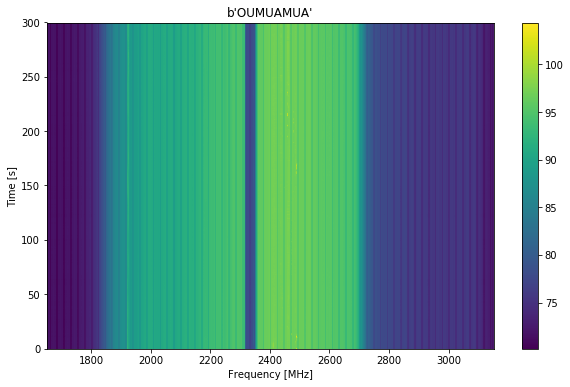

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall()

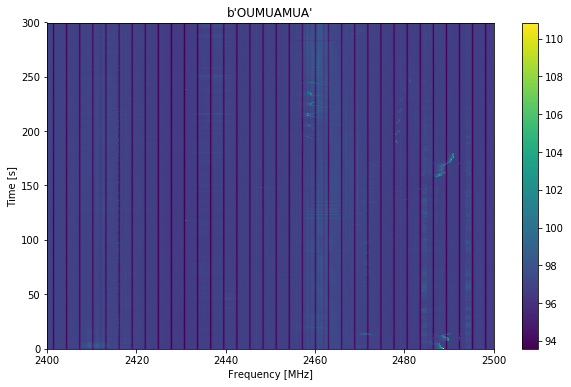

In [11]:
plt.figure(figsize=(10,6))
fil.plot_waterfall(f_start=2400, f_stop=2500)

In [24]:
section = Waterfall('/Users/bbrzycki/Documents/Research/Breakthrough-Listen/Code/bl-interns/bbrzycki/ml_search/test2.fil')

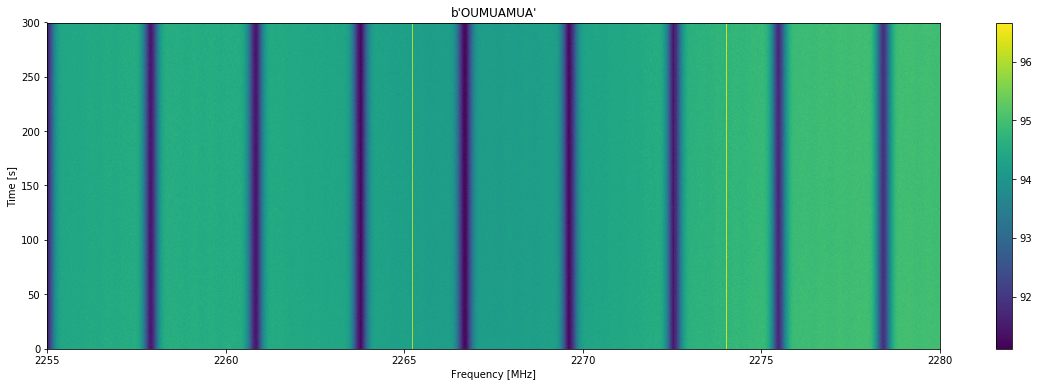

In [25]:
plt.figure(figsize=(20,6))
section.plot_waterfall()

In [26]:
section0 = Waterfall('/Users/bbrzycki/Documents/Research/Breakthrough-Listen/Code/bl-interns/bbrzycki/ml_search/0.fil')
section1 = Waterfall('/Users/bbrzycki/Documents/Research/Breakthrough-Listen/Code/bl-interns/bbrzycki/ml_search/1.fil')

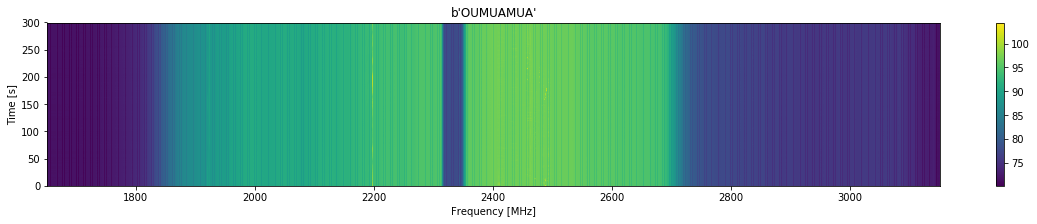

In [31]:
plt.figure(figsize=(20,3))
fil.plot_waterfall()

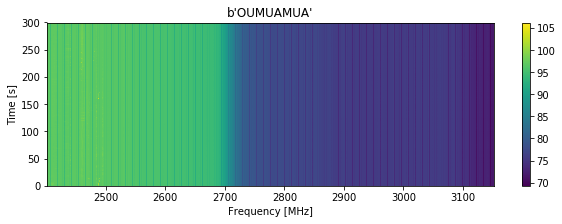

In [32]:
plt.figure(figsize=(10,3))
section0.plot_waterfall()

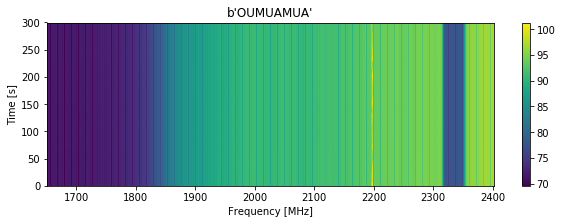

In [33]:
plt.figure(figsize=(10,3))
section1.plot_waterfall()

In [9]:
fil.info()


--- File Info ---
   b'machine_id' :                               20
 b'telescope_id' :                                6
    b'data_type' :                                1
         b'fch1' :               3151.4634132385254
         b'foff' :             -0.00286102294921875
       b'nchans' :                           524288
  b'source_name' :                      b'OUMUAMUA'
      b'src_raj' :                     23d21m39.72s
      b'src_dej' :                      7d53m01.68s
     b'az_start' :                              0.0
     b'za_start' :                              0.0
        b'nbits' :                               32
       b'tstart' :                58100.91206018518
        b'tsamp' :               1.0737418239999998
         b'nifs' :                                1

Num ints in file :                            279.0
      File shape :               (279.0, 1, 524288)
--- Selection Info ---
Data selection shape :                 (279, 1, 524288)
Minimum freq (MHz

In [11]:
freqs = fil.freqs
print(freqs)
print(type(freqs))

[3151.46341324 3151.46055222 3151.45769119 ... 1651.47199631 1651.46913528
 1651.46627426]
<class 'numpy.ndarray'>


In [13]:
data = fil.data
print(data.shape)
print(type(data))

(279, 1, 524288)
<class 'numpy.ndarray'>


In [15]:
import pprint 
header = fil.header
pprint.pprint(header)

{b'az_start': 0.0,
 b'data_type': 1,
 b'fch1': 3151.4634132385254,
 b'foff': -0.00286102294921875,
 b'machine_id': 20,
 b'nbits': 32,
 b'nchans': 524288,
 b'nifs': 1,
 b'source_name': b'OUMUAMUA',
 b'src_dej': <Angle 7.8838 deg>,
 b'src_raj': <Angle 23.36103333 deg>,
 b'telescope_id': 6,
 b'tsamp': 1.0737418239999998,
 b'tstart': 58100.91206018518,
 b'za_start': 0.0}


In [17]:
header[b'tsamp']

1.0737418239999998

In [21]:
def maxfreq(file):
    """Return central frequency of the highest-frequency bin in a .fil file.""" 
    
    from blimpy import read_header
    return read_header(file)[b'fch1']

def minfreq(file):
    """Return central frequency of the lowest-frequency bin in a .fil file"""
    
    from blimpy import read_header
    fch1 = read_header(file)[b'fch1']
    nchans = read_header(file)[b'nchans']
    ch_bandwidth = read_header(file)[b'foff']
    return fch1 + nchans*ch_bandwidth

In [22]:
maxfreq(data_fn)

3151.4634132385254

In [23]:
minfreq(data_fn)

1651.4634132385254

In [390]:
data_fn

'data/spliced_blc0001020304050607_guppi_58100_78802_OUMUAMUA_0011.gpuspec.0002.fil'

In [411]:
import numpy as np
from blimpy import read_header, Waterfall

def split_filterbank(input_fn, f_sample_num, f_shift=None):
    """
    Splits filterbank file into smaller filterbank files and write them to disk
    
    Args:
        input_fn, filename of .fil data
    """
    
    fch1 = read_header(input_fn)[b'fch1']
    nchans = read_header(input_fn)[b'nchans']
    ch_bandwidth = read_header(input_fn)[b'foff']
    
    if f_shift is None:
        f_shift = f_sample_num
    
    f_start = fch1
    f_stop = fch1 + f_sample_num * ch_bandwidth
    
    # Iterates down frequencies, starting from highest
    index = 0
    while f_stop >= fch1 + nchans * ch_bandwidth:
        split = Waterfall(input_fn, f_start=f_start, f_stop=f_stop)
        split.write_to_fil(str(index)+'.fil')
        f_start += f_shift * ch_bandwidth
        f_stop += f_shift * ch_bandwidth
        index += 1

In [412]:
split_filterbank(data_fn, 524288)

blimpy.file_wrapper WARNING  Given f_stop < f_start, assuming reversed values.


TypeError: can't concat str to bytes

In [32]:
data

array([[[7853659. , 7377311.5, 7392359.5, ..., 8065497. , 8104852.5,
         8012045. ]],

       [[7602000. , 7583078. , 7517909.5, ..., 8086905. , 8104554. ,
         8222041. ]],

       [[7496936. , 7397357.5, 7543368.5, ..., 8169385.5, 8013204. ,
         8317873.5]],

       ...,

       [[7550805. , 7591779. , 7389625. , ..., 8377064.5, 8003748.5,
         8179739.5]],

       [[7736379. , 7486966. , 7648829. , ..., 8074414.5, 7898547. ,
         7965662. ]],

       [[7413349. , 7623082.5, 7440348.5, ..., 7966466.5, 7905019.5,
         8017004. ]]], dtype=float32)

In [34]:
np.squeeze(data).shape

(279, 524288)

In [268]:
# fil = Waterfall(input_fn)
# data = np.squeeze(fil.data)
import sys

def split_data(data, f_sample_num=None, f_min=None, f_max=None,
                        t_sample_num=None, t_min=None, t_max=None):
    """
    Split NumPy arrays into a list of smaller arrays according to limits in frequency and time.
    This doesn't reduce/combine data, it simply cuts the data into smaller chunks.
    
    Return:
        data as list of NumPy arrays
    """
    
    # Ensure data is a Python list for following NumPy array operations
    if not isinstance(data, list):
        data = [data]
        
    if not isinstance(data[0], np.ndarray):
            sys.exit("Input data must be NumPy arrays!")
    
    t_width, f_width = data[0].shape
    
    f_bin_num = int(np.floor(f_width / f_sample_num))
    t_bin_num = int(np.floor(t_width / t_sample_num))
    print(f_bin_num, t_bin_num)
    
    # Split by time sample number
    if t_sample_num is not None:
        data = np.array_split(data[0], t_bin_num, axis=0)
        
    # Split by frequency sample number
    if f_sample_num is not None:
        temp = data
        data = []
        for t_frame in temp:
            for frame in np.array_split(t_frame, f_bin_num, axis=1):
                data.append(frame)
        
    
    
    return data

In [353]:
# fil = Waterfall(input_fn)
# data = np.squeeze(fil.data)
import sys

def split_data(data, x_sample_num=None, y_sample_num=None,
                     x_shift=None, y_shift=None, 
                     x_trim=False, y_trim=False):
    """
    Split NumPy arrays into a list of smaller arrays according to limits in frequency and time.
    This doesn't reduce/combine data, it simply cuts the data into smaller chunks.
    
    Args:
        data, NumPy array (ndarray)
    
    Return:
        split_data, list of NumPy arrays
    """
    
    split_data = []
        
    if not isinstance(data, np.ndarray):
        sys.exit("Input data must be a NumPy array!")
        
    height, width = data.shape
    
    if x_sample_num is None:
        x_sample_num = width
    if y_sample_num is None:
        y_sample_num = height
            
    if x_shift is None:
        x_shift = x_sample_num
    elif x_shift <= 0:
        sys.exit("Invalid x-direction shift!")
        
    if y_shift is None:
        y_shift = y_sample_num
    elif y_shift <= 0:
        sys.exit("Invalid y-direction shift!")
    
    # Save first frame, regardless of overstepping bounds
    y_start = 0
    y_stop = min(y_sample_num, height)
    x_start = 0
    x_stop = min(x_sample_num, width)
    split_data.append(data[y_start:y_stop,x_start:x_stop])
    y_in_bound = (y_stop < height)
    x_in_bound = (x_stop < width)
    
    # As long as either bound is valid, continue adding frames
    while y_in_bound or x_in_bound:
        
        # Shift frames in the x direction
        while x_in_bound:
            x_start = x_start + x_shift
            x_stop = min(x_stop + x_shift, width)
            split_data.append(data[y_start:y_stop,x_start:x_stop])
            x_in_bound = (x_stop < width)
            
        # Break when both y and x are out of bounds
        if not y_in_bound:
            break
            
        # Shift frames in the y direction and reset x indices
        y_start = y_start + y_shift
        y_stop = min(y_stop + y_shift, height)
        x_start = 0
        x_stop = min(x_sample_num, width)
        split_data.append(data[y_start:y_stop,x_start:x_stop])
        y_in_bound = (y_stop < height)
        x_in_bound = (x_stop < width)
                
    # Filter out frames that aren't the same specied size
    if y_trim:
        split_data = list(filter(lambda A: A.shape[0] == y_sample_num, split_data))
    if x_trim:
        split_data = list(filter(lambda A: A.shape[1] == x_sample_num, split_data))
    return split_data

In [282]:
sample_data = [[0,1,2,3,4,5,6,7],
               [6,7,8,9,10,11,12,13],
               [12,13,14,15,16,17,18,19],
               [18,19,20,21,22,23,24,25]]
sample_data = np.squeeze(sample_data)
sample_data

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [12, 13, 14, 15, 16, 17, 18, 19],
       [18, 19, 20, 21, 22, 23, 24, 25]])

In [354]:
pprint.pprint(split_data(sample_data, x_sample_num = 4, y_sample_num = 2, x_shift = None, y_shift = None, x_trim = True, y_trim = False))

[array([[0, 1, 2, 3],
       [6, 7, 8, 9]]),
 array([[ 4,  5,  6,  7],
       [10, 11, 12, 13]]),
 array([[12, 13, 14, 15],
       [18, 19, 20, 21]]),
 array([[16, 17, 18, 19],
       [22, 23, 24, 25]])]


In [368]:
split_data(sample_data, y_sample_num = 1)

[array([[0, 1, 2, 3, 4, 5, 6, 7]]),
 array([[ 6,  7,  8,  9, 10, 11, 12, 13]]),
 array([[12, 13, 14, 15, 16, 17, 18, 19]]),
 array([[18, 19, 20, 21, 22, 23, 24, 25]])]

In [363]:
squeeze_data = np.squeeze(data)
pprint.pprint(squeeze_data)

array([[7853659. , 7377311.5, 7392359.5, ..., 8065497. , 8104852.5,
        8012045. ],
       [7602000. , 7583078. , 7517909.5, ..., 8086905. , 8104554. ,
        8222041. ],
       [7496936. , 7397357.5, 7543368.5, ..., 8169385.5, 8013204. ,
        8317873.5],
       ...,
       [7550805. , 7591779. , 7389625. , ..., 8377064.5, 8003748.5,
        8179739.5],
       [7736379. , 7486966. , 7648829. , ..., 8074414.5, 7898547. ,
        7965662. ],
       [7413349. , 7623082.5, 7440348.5, ..., 7966466.5, 7905019.5,
        8017004. ]], dtype=float32)


In [365]:
y = split_data(squeeze_data, x_sample_num = 1024, y_sample_num = None)

In [366]:
len(y)

512

In [330]:
x = split_data(sample_data, x_sample_num = 3, y_sample_num = 4, x_shift = 2, x_trim = True)

# pprint.pprint(list(filter(lambda y: y.shape == (4,3), x)))

In [154]:
import unittest

class MyTest(unittest.TestCase):
    def test(self):
        self.assertTrue(
            np.alltrue(split_fil(sample_data) ==
            np.array([[ 0,  1,  2,  3,  4,  5,  6,  7],
               [ 6,  7,  8,  9, 10, 11, 12, 13],
               [12, 13, 14, 15, 16, 17, 18, 19],
               [18, 19, 20, 21, 22, 23, 24, 25]])))
        
x = MyTest()

In [276]:
from numpy import *
x = range(16)
x = reshape(x,(4,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [280]:
x[[[0],[2]],[1,3]]
x[0:2,0:3]

array([[0, 1, 2],
       [4, 5, 6]])

In [85]:
pprint.pprint(split_fil(data_fn, f_sample_num = 2, t_sample_num = 2))

[array([[[7.8536590e+06, 7.3773115e+06, 7.3923595e+06, ...,
         2.5330875e+09, 2.4579361e+09, 2.5043374e+09],
        [7.6020000e+06, 7.5830780e+06, 7.5179095e+06, ...,
         2.4656586e+09, 2.4909996e+09, 2.4193861e+09],
        [7.4969360e+06, 7.3973575e+06, 7.5433685e+06, ...,
         2.4186150e+09, 2.4638428e+09, 2.4685775e+09],
        ...,
        [7.5508050e+06, 7.5917790e+06, 7.3896250e+06, ...,
         2.4437115e+09, 2.5215007e+09, 2.4927378e+09],
        [7.7363790e+06, 7.4869660e+06, 7.6488290e+06, ...,
         2.5019149e+09, 2.5019251e+09, 2.5333827e+09],
        [7.4133490e+06, 7.6230825e+06, 7.4403485e+06, ...,
         2.4731497e+09, 2.4972972e+09, 2.4914803e+09]]], dtype=float32),
 array([[[2.5247204e+09, 2.4153444e+09, 2.4903370e+09, ...,
         8.0654970e+06, 8.1048525e+06, 8.0120450e+06],
        [2.4442675e+09, 2.4342200e+09, 2.5121114e+09, ...,
         8.0869050e+06, 8.1045540e+06, 8.2220410e+06],
        [2.4467031e+09, 2.4495427e+09, 2.4437338e+09, .

In [40]:
array = split_fil(data_fn)

In [52]:
np.hsplit(array, 2)

[array([[7.8536590e+06, 7.3773115e+06, 7.3923595e+06, ..., 2.5330875e+09,
         2.4579361e+09, 2.5043374e+09],
        [7.6020000e+06, 7.5830780e+06, 7.5179095e+06, ..., 2.4656586e+09,
         2.4909996e+09, 2.4193861e+09],
        [7.4969360e+06, 7.3973575e+06, 7.5433685e+06, ..., 2.4186150e+09,
         2.4638428e+09, 2.4685775e+09],
        ...,
        [7.5508050e+06, 7.5917790e+06, 7.3896250e+06, ..., 2.4437115e+09,
         2.5215007e+09, 2.4927378e+09],
        [7.7363790e+06, 7.4869660e+06, 7.6488290e+06, ..., 2.5019149e+09,
         2.5019251e+09, 2.5333827e+09],
        [7.4133490e+06, 7.6230825e+06, 7.4403485e+06, ..., 2.4731497e+09,
         2.4972972e+09, 2.4914803e+09]], dtype=float32),
 array([[2.5247204e+09, 2.4153444e+09, 2.4903370e+09, ..., 8.0654970e+06,
         8.1048525e+06, 8.0120450e+06],
        [2.4442675e+09, 2.4342200e+09, 2.5121114e+09, ..., 8.0869050e+06,
         8.1045540e+06, 8.2220410e+06],
        [2.4467031e+09, 2.4495427e+09, 2.4437338e+09, ...,

In [77]:
if 40:
    print(np.array_split(array, 1, axis=1))

[array([[7853659. , 7377311.5, 7392359.5, ..., 8065497. , 8104852.5,
        8012045. ],
       [7602000. , 7583078. , 7517909.5, ..., 8086905. , 8104554. ,
        8222041. ],
       [7496936. , 7397357.5, 7543368.5, ..., 8169385.5, 8013204. ,
        8317873.5],
       ...,
       [7550805. , 7591779. , 7389625. , ..., 8377064.5, 8003748.5,
        8179739.5],
       [7736379. , 7486966. , 7648829. , ..., 8074414.5, 7898547. ,
        7965662. ],
       [7413349. , 7623082.5, 7440348.5, ..., 7966466.5, 7905019.5,
        8017004. ]], dtype=float32)]
